In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("updated_report.csv")


In [3]:
df.shape

(36382, 10)

In [4]:
# df = df.drop('Unnamed: 10', axis=1)

In [5]:
df.head(2)

,RegistrationNumber,CourseCode,CourseName,Section,TermId,StudentName,StudentGroup,TotalPresent,TotalScheduled,ProgramName
0,321100055,EHIS631,TWENTIETH CENTURY WORLD,02UAO,224252,R Chaitra,1,0,3,Master of Arts (English)
1,321100062,ECAP785,WEB PERFORMANCE OPTIMIZATION,02DAF,224252,Sahil,1,1,3,Master of Computer Applications


In [6]:
df.describe()

,RegistrationNumber,TermId,StudentGroup,TotalPresent,TotalScheduled
count,3.638200e+04,36382.000000,36382.000000,36382.000000,36382.000000
mean,3.232534e+08,174606.553323,1.000302,1.620582,3.989610
std,5.957804e+05,49997.421071,0.017386,2.170291,2.723842
min,3.211000e+08,122232.000000,1.000000,0.000000,1.000000
25%,3.231011e+08,124251.000000,1.000000,0.000000,3.000000
50%,3.231037e+08,224251.000000,1.000000,1.000000,3.000000
75%,3.241001e+08,224251.000000,1.000000,3.000000,5.000000
max,3.241026e+08,224252.000000,2.000000,12.000000,12.000000


In [7]:
df.isnull().sum()

RegistrationNumber    0
CourseCode            0
CourseName            0
Section               0
TermId                0
StudentName           0
StudentGroup          0
TotalPresent          0
TotalScheduled        0
ProgramName           0
dtype: int64

In [8]:
# df.to_csv("updated_report.csv", index=False)

In [9]:
df.duplicated().sum()

0

In [10]:
program_distribution = df['ProgramName'].value_counts()
print(program_distribution)

ProgramName
Master of Business Administration     15331
Master of Computer Applications       10104
Master of Science (Mathematics)        3833
Bachelor of Computer Applications      3146
Bachelor of Arts                       1158
Master of Arts (English)                771
Master of Arts (Economics)              604
Bachelor of Commerce                    560
Master of Arts (History)                244
Master of Arts (Political Science)      232
Master of Arts (Sociology)              225
Master of Commerce                      174
Name: count, dtype: int64


In [11]:
avg_attendance = df.groupby('CourseName')[['TotalPresent', 'TotalScheduled']].mean()
print(avg_attendance)

                              TotalPresent  TotalScheduled
CourseName                                                
ACADEMIC ENGLISH                  0.866029        1.985646
ADHUNIK HINDI KAVYA               0.888889        2.888889
ADVANCE DATA VISUALIZATION        1.128395        2.883951
ADVANCED ABSTRACT ALGEBRA-I       1.757225        5.971098
ADVANCED ABSTRACT ALGEBRA-II      1.023810        2.809524
...                                    ...             ...
WEB PERFORMANCE OPTIMIZATION      0.971910        2.792135
WEB TECHNOLOGIES                  1.566406        2.859375
WIRELESS AND MOBILE NETWORK       1.307692        2.692308
WOMEN IN INDIAN HISTORY           0.750000        2.909091
WOMEN'S WRITING                   1.000000        2.600000

[208 rows x 2 columns]


# Present vs Absent w.r.t courseCode

In [12]:
program_distribution = df['CourseCode'].value_counts()
print(program_distribution)

CourseCode
EMGN581    1291
EMKT503    1202
EMGN578    1168
EPEA515    1010
EMGN571     978
           ... 
EMTH256       3
EHIN211       3
EHIN210       2
ECAP917       2
EHIS110       1
Name: count, Length: 222, dtype: int64


counted the the column "TotalPresent" and anbsent as column-presentcount :
presentcount = present is x>0 else absent 

In [13]:
df['AttendanceStatus'] = df['TotalPresent'].apply(lambda x: 'present' if x > 0 else 'absent')

attendance_counts = df.groupby(['CourseCode', 'AttendanceStatus']).size().unstack(fill_value=0)

print(attendance_counts)

AttendanceStatus  absent  present
CourseCode                       
EACC105                5        6
EACC204               27       21
EACC210               26       16
EACC215               10        7
EACC301               33        9
...                  ...      ...
ESOC558                5        7
ESOC580                5        7
ESOC611               14       10
ESOC614               16       14
ESSC501               46       40

[222 rows x 2 columns]


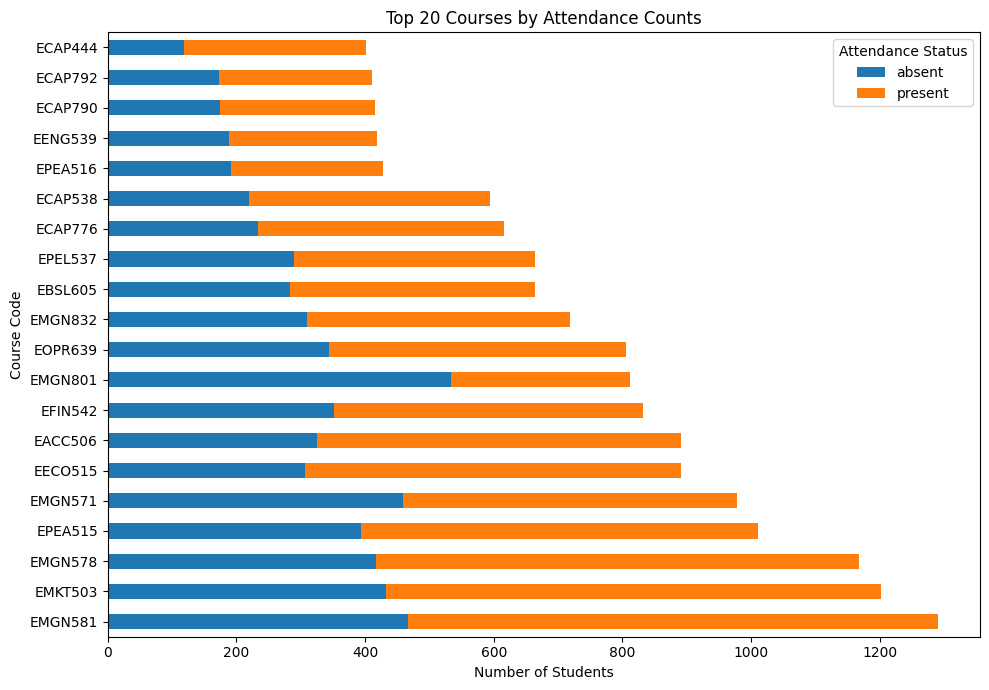

In [14]:
attendance_counts['Total'] = attendance_counts.sum(axis=1)

top_n = 20
top_courses = attendance_counts.sort_values(by='Total', ascending=False).head(top_n)

top_courses.drop(columns='Total').plot(kind='barh', stacked=True, figsize=(10, 7))

plt.title(f'Top {top_n} Courses by Attendance Counts')
plt.xlabel('Number of Students')
plt.ylabel('Course Code')
plt.legend(title='Attendance Status')
plt.tight_layout()

plt.show()

In [15]:
perfect_attendance = df[df['TotalPresent'] == df['TotalScheduled']]
print(perfect_attendance)

       RegistrationNumber CourseCode                              CourseName  \
2               321200339    ECAP782              ADVANCE DATA VISUALIZATION   
10              322100309    EACC301                   MANAGEMENT ACCOUNTING   
26              322102055    ECAP951            SOFTWARE PROJECT MANAGEMENT    
27              322102055    EMKT517        CUSTOMER RELATIONSHIP MANAGEMENT   
28              322102919    EECO532                        PUBLIC ECONOMICS   
...                   ...        ...                                     ...   
36341           324101923    EMKT503                    MARKETING MANAGEMENT   
36349           324101936    EMKT503                    MARKETING MANAGEMENT   
36351           324101944    ECAP170  FUNDAMENTALS OF INFORMATION TECHNOLOGY   
36353           324101948    EMTH136                     DISCRETE STRUCTURES   
36365           324101978    ECAP010                        PROGRAMMING IN C   

      Section  TermId               Stu

# Popularity of courses

In [16]:
course_popularity = df['CourseName'].value_counts()
print(course_popularity)

CourseName
ORGANISATIONAL BEHAVIOUR AND HUMAN RESOURCE DYNAMICS    1291
MARKETING MANAGEMENT                                    1202
INTERNATIONAL BUSINESS ENVIRONMENT                      1168
ANALYTICAL SKILLS-I                                     1010
CORPORATE STRATEGY AND ENTREPRENEURSHIP                  978
                                                        ... 
INTRODUCTION TO POLITICAL THEORY                           3
REKHACHITARA TATHA SANSMARAN                               3
FRONT-END JAVASCRIPT FRAMEWORKS                            2
LOK SAHITYA                                                2
HISTORY OF INDIA FROM THE EARLIEST TIME UPTO 300 CE        1
Name: count, Length: 208, dtype: int64


# Plot Program Distribution

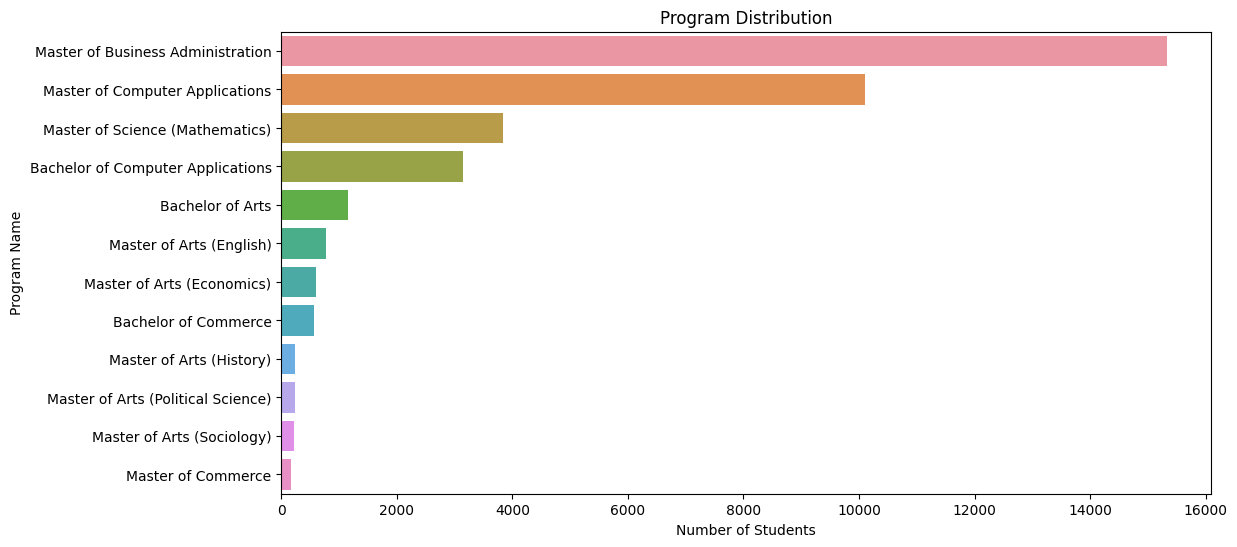

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(y='ProgramName', data=df, order=df['ProgramName'].value_counts().index)
plt.title('Program Distribution')
plt.xlabel('Number of Students')
plt.ylabel('Program Name')
plt.show()

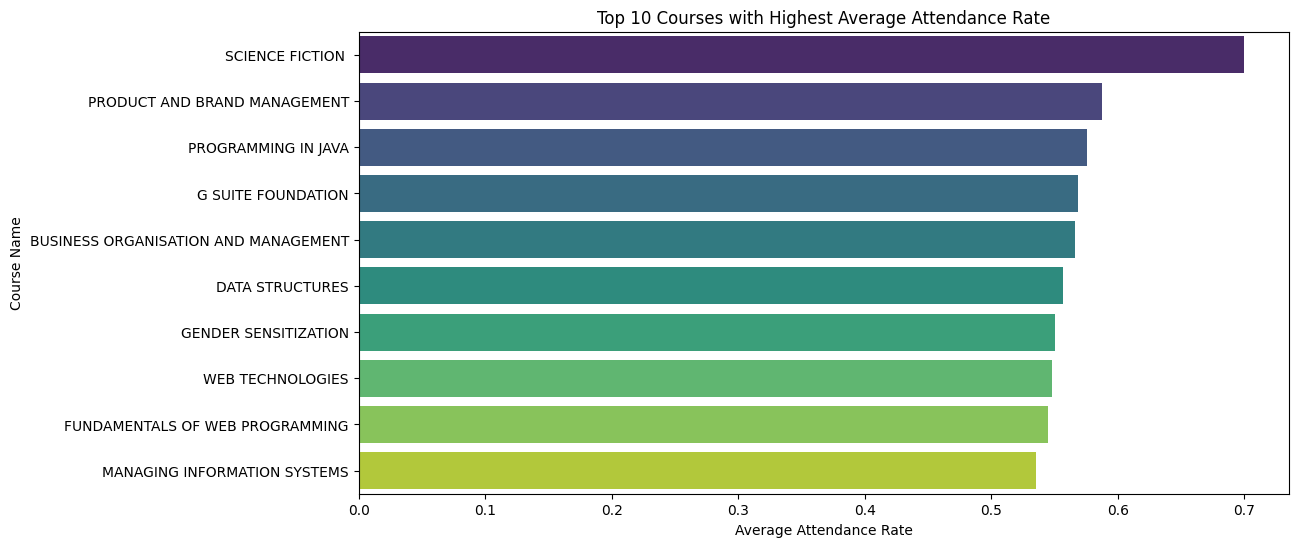

In [18]:
df['AttendanceRate'] = df['TotalPresent'] / df['TotalScheduled']

avg_attendance = df.groupby('CourseName')[['TotalPresent', 'TotalScheduled']].mean().reset_index()
avg_attendance['AttendanceRate'] = avg_attendance['TotalPresent'] / avg_attendance['TotalScheduled']

top_courses_avg_attendance = avg_attendance.sort_values(by='AttendanceRate', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='AttendanceRate', y='CourseName', data=top_courses_avg_attendance, palette="viridis")
plt.title('Top 10 Courses with Highest Average Attendance Rate')
plt.xlabel('Average Attendance Rate')
plt.ylabel('Course Name')
plt.show()

/Users/visheshyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


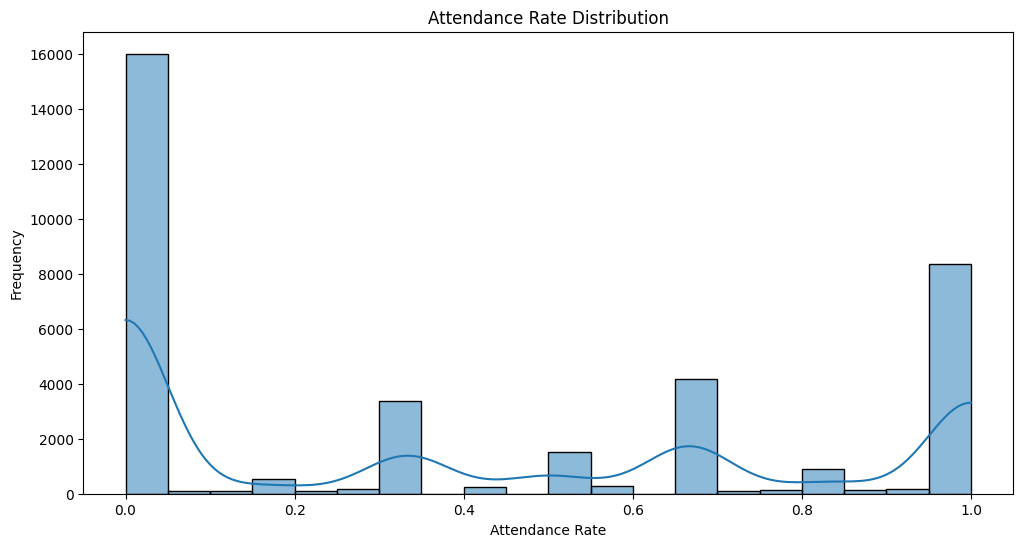

In [19]:
df['AttendanceRate'] = df['TotalPresent'] / df['TotalScheduled']

plt.figure(figsize=(12, 6))
sns.histplot(df['AttendanceRate'], bins=20, kde=True)
plt.title('Attendance Rate Distribution')
plt.xlabel('Attendance Rate')
plt.ylabel('Frequency')
plt.show()

# Extract Insights

## Top 5 Programs by Student Count

Top 5 Programs by Student Count:
ProgramName
Master of Business Administration    15331
Master of Computer Applications      10104
Master of Science (Mathematics)       3833
Bachelor of Computer Applications     3146
Bachelor of Arts                      1158
Name: count, dtype: int64


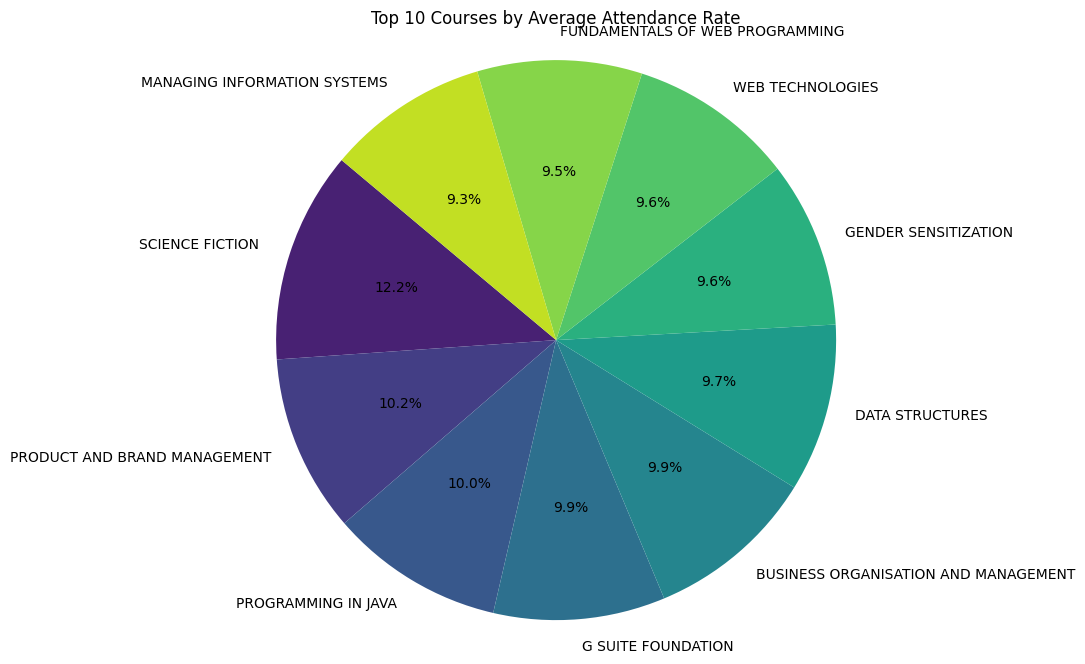

In [20]:


top_programs = df['ProgramName'].value_counts().head(5)
print("Top 5 Programs by Student Count:")
print(top_programs)

plt.figure(figsize=(10, 8))
plt.pie(top_courses_avg_attendance['AttendanceRate'], labels=top_courses_avg_attendance['CourseName'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(top_courses_avg_attendance)))
plt.title('Top 10 Courses by Average Attendance Rate')
plt.axis('equal')  
plt.show()

## top 10 c

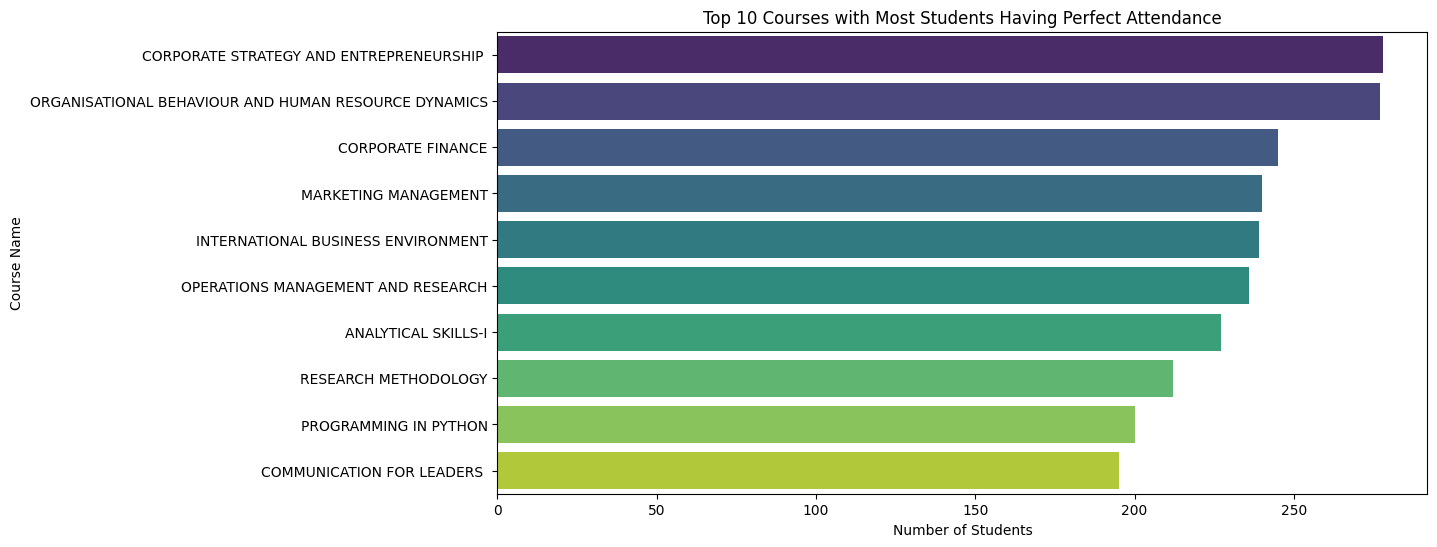

In [21]:

df['AttendanceRate'] = df['TotalPresent'] / df['TotalScheduled']


perfect_attendance = df[df['TotalPresent'] == df['TotalScheduled']]


top_courses_perfect_attendance = perfect_attendance['CourseName'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_courses_perfect_attendance.values, y=top_courses_perfect_attendance.index, palette="viridis")
plt.title('Top 10 Courses with Most Students Having Perfect Attendance')
plt.xlabel('Number of Students')
plt.ylabel('Course Name')
plt.show()

# RAW Plotting the information


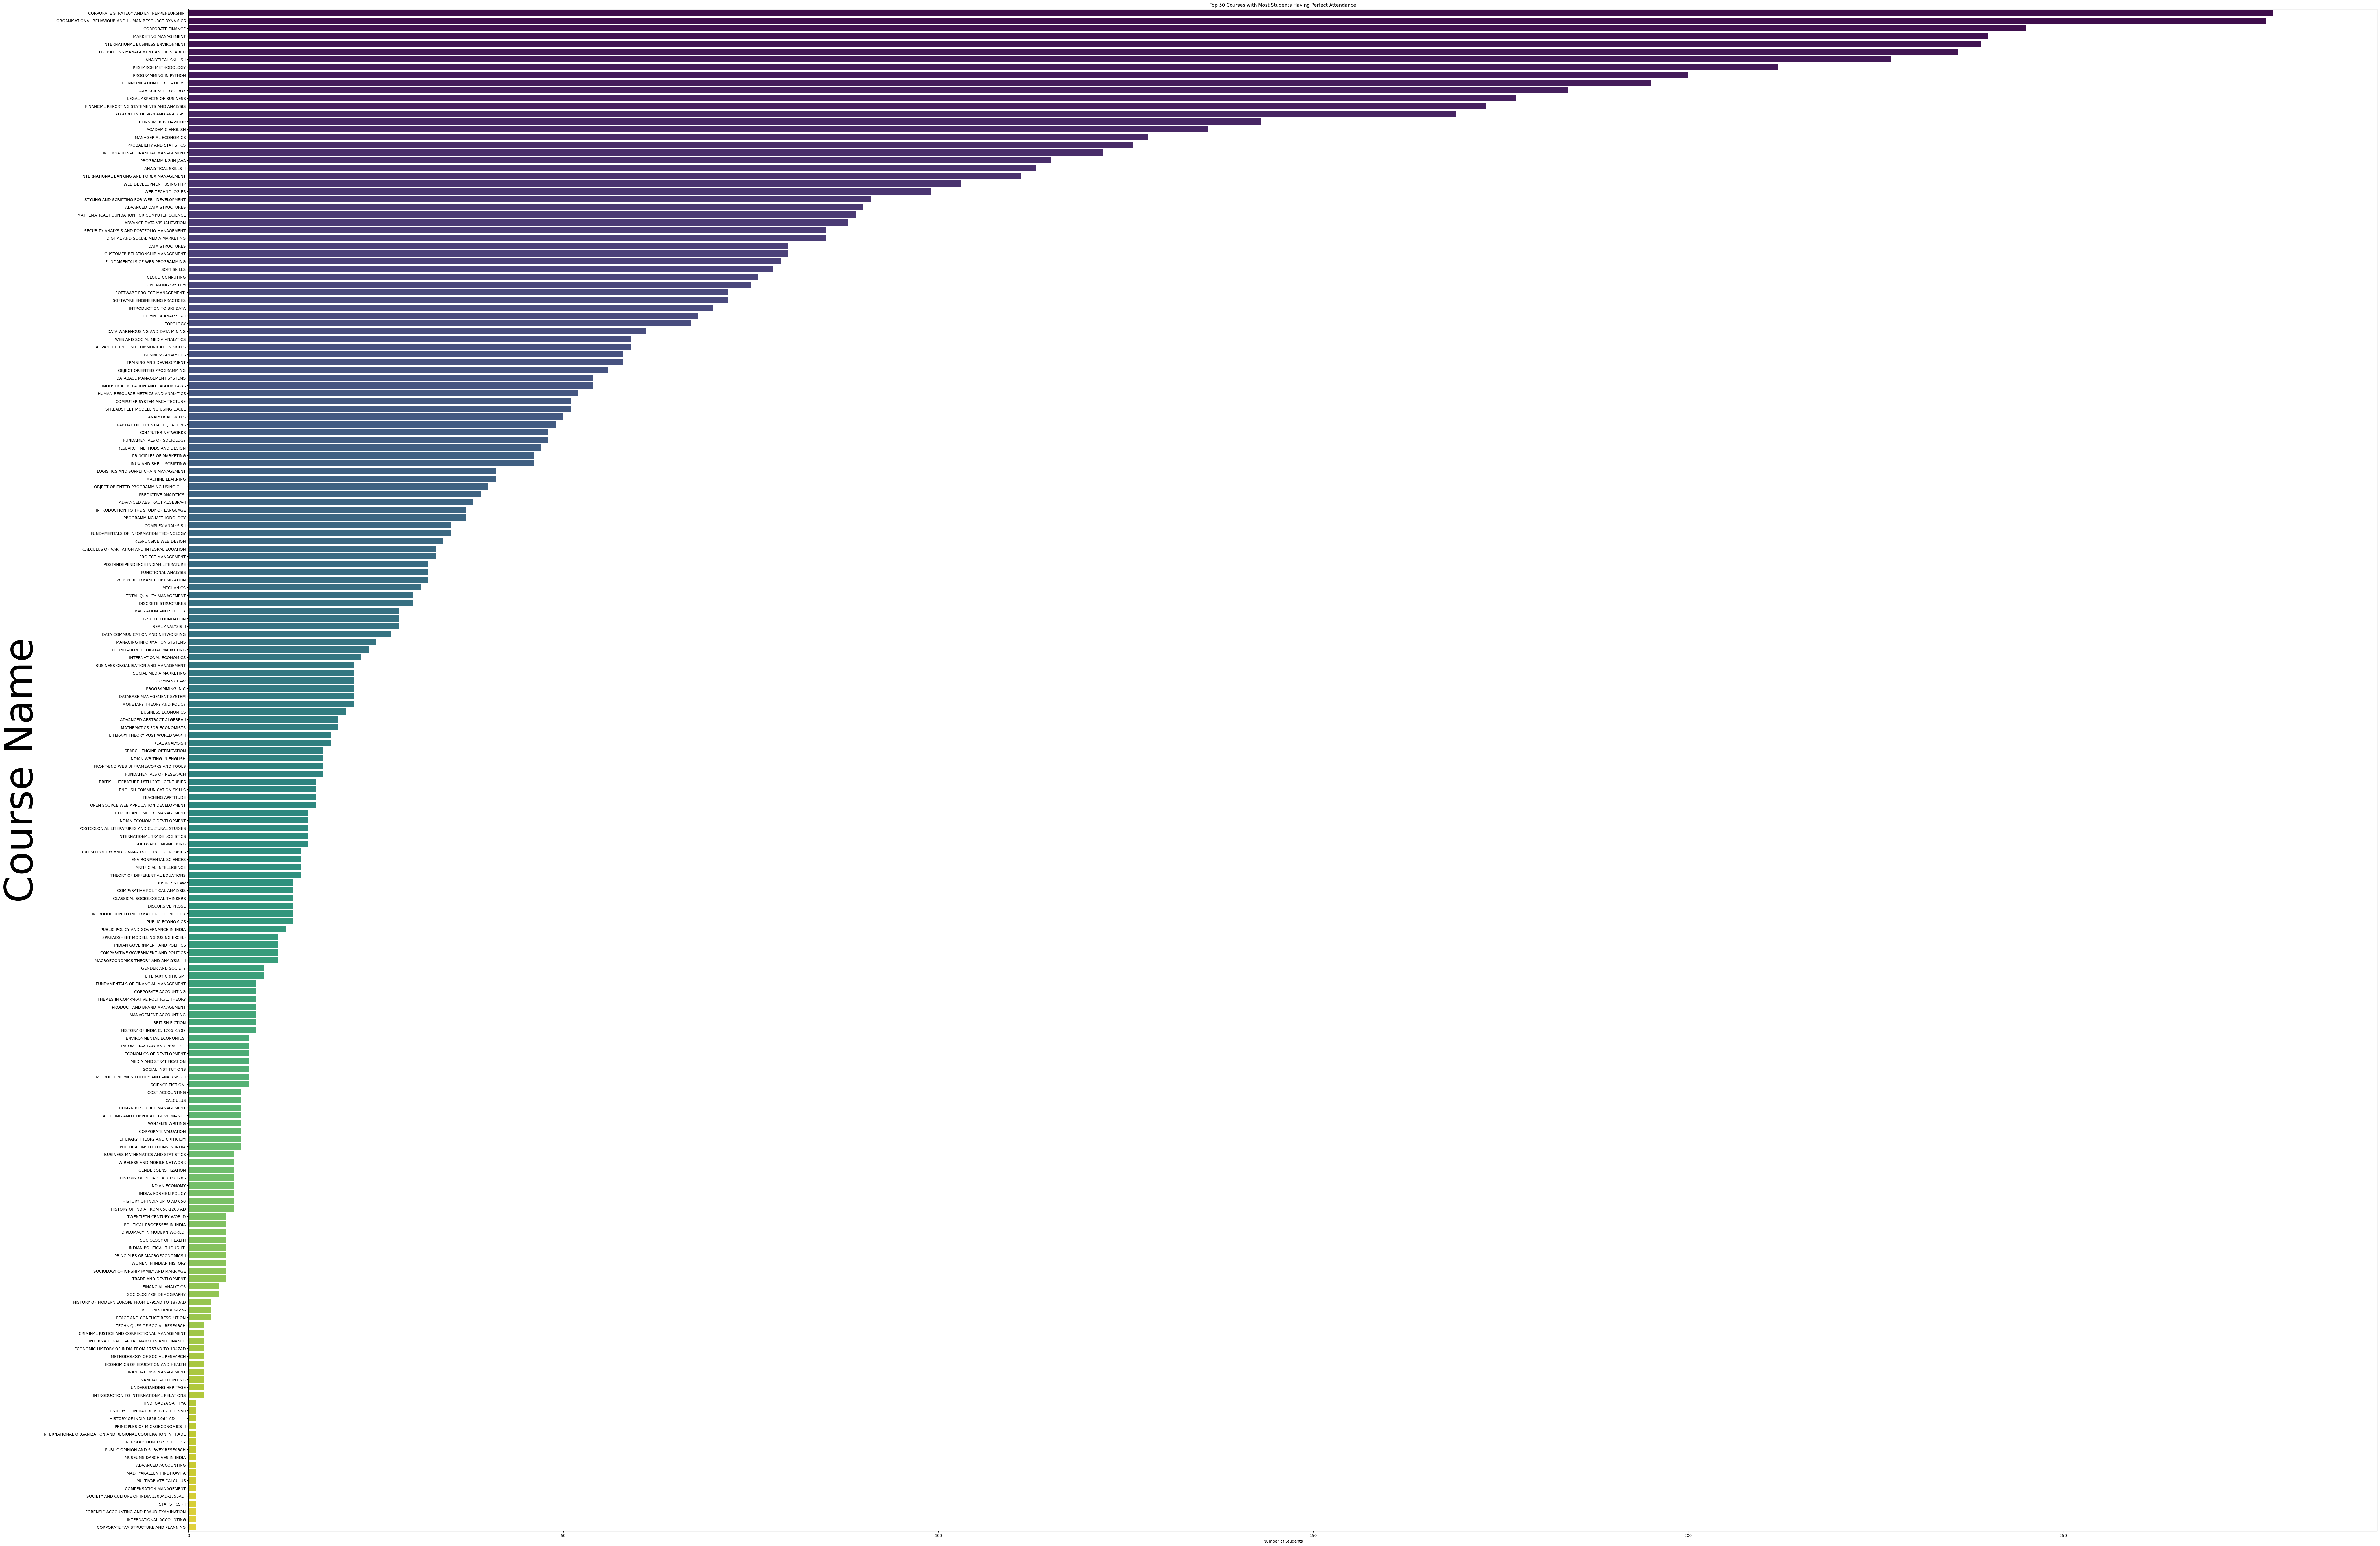

In [22]:
plt.figure(figsize=(100, 70))
attendance_count = perfect_attendance['CourseName'].value_counts() # Limiting to top 20 courses for readability
sns.barplot(x=attendance_count.values, y=attendance_count.index, palette='viridis')
plt.title('Top 50 Courses with Most Students Having Perfect Attendance')
plt.xlabel('Number of Students')
plt.ylabel('Course Name',fontsize=100)
plt.show()

## Refined Plotting the information top10

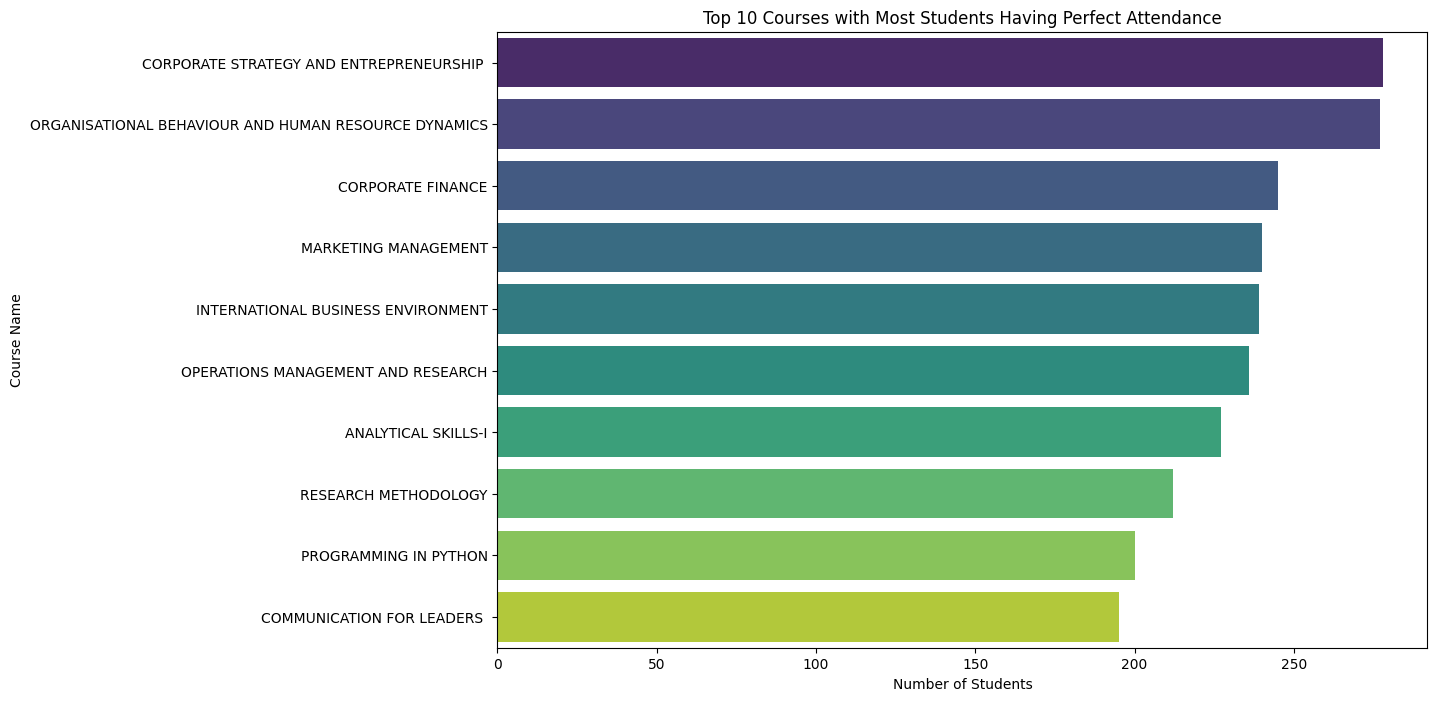

In [23]:

plt.figure(figsize=(12, 8))
attendance_count = perfect_attendance['CourseName'].value_counts().head(10) # Limiting to top 20 courses for readability
sns.barplot(x=attendance_count.values, y=attendance_count.index, palette='viridis')
plt.title('Top 10 Courses with Most Students Having Perfect Attendance')
plt.xlabel('Number of Students')
plt.ylabel('Course Name')
plt.show()

# HM

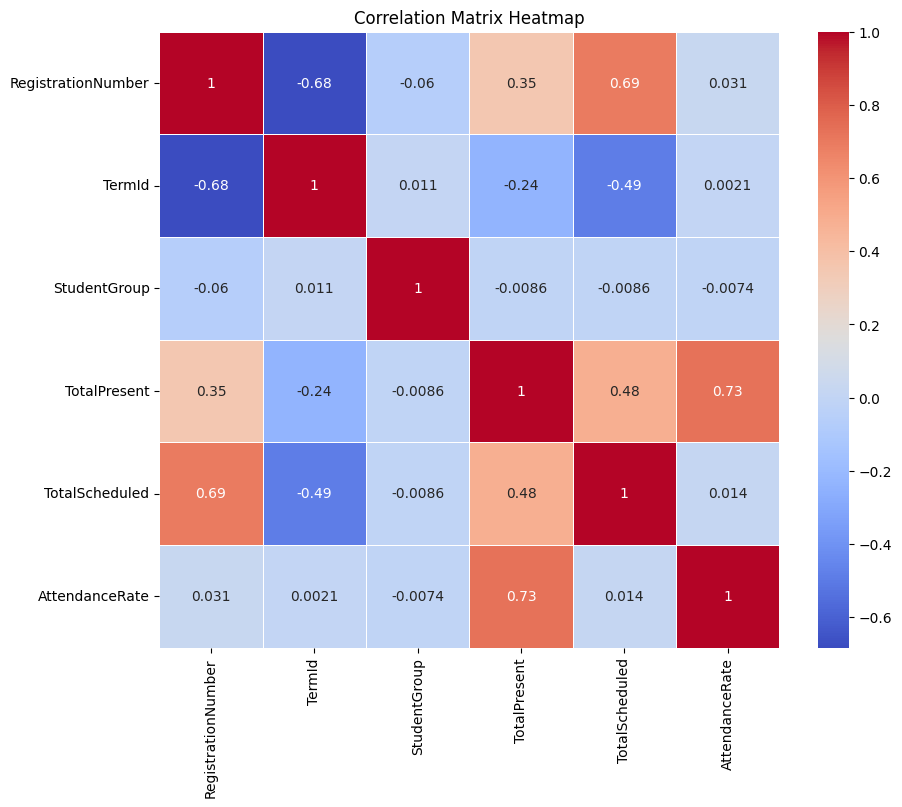

In [24]:


df['AttendanceRate'] = df['TotalPresent'] / df['TotalScheduled']

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# MISC

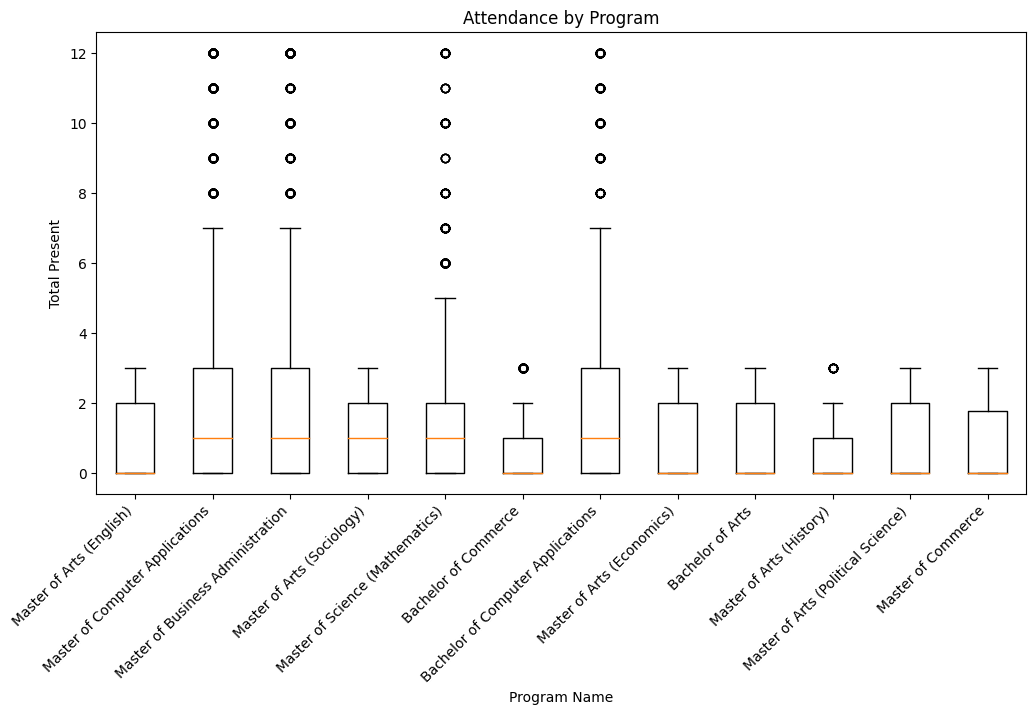

In [25]:
plt.figure(figsize=(12, 6))
plt.boxplot([df['TotalPresent'][df['ProgramName'] == p] for p in df['ProgramName'].unique()], labels=df['ProgramName'].unique())
plt.xlabel('Program Name')
plt.ylabel('Total Present')
plt.title('Attendance by Program')
_ = plt.xticks(rotation=45, ha='right')

# HM 2: Attendance Rate by Program and Course

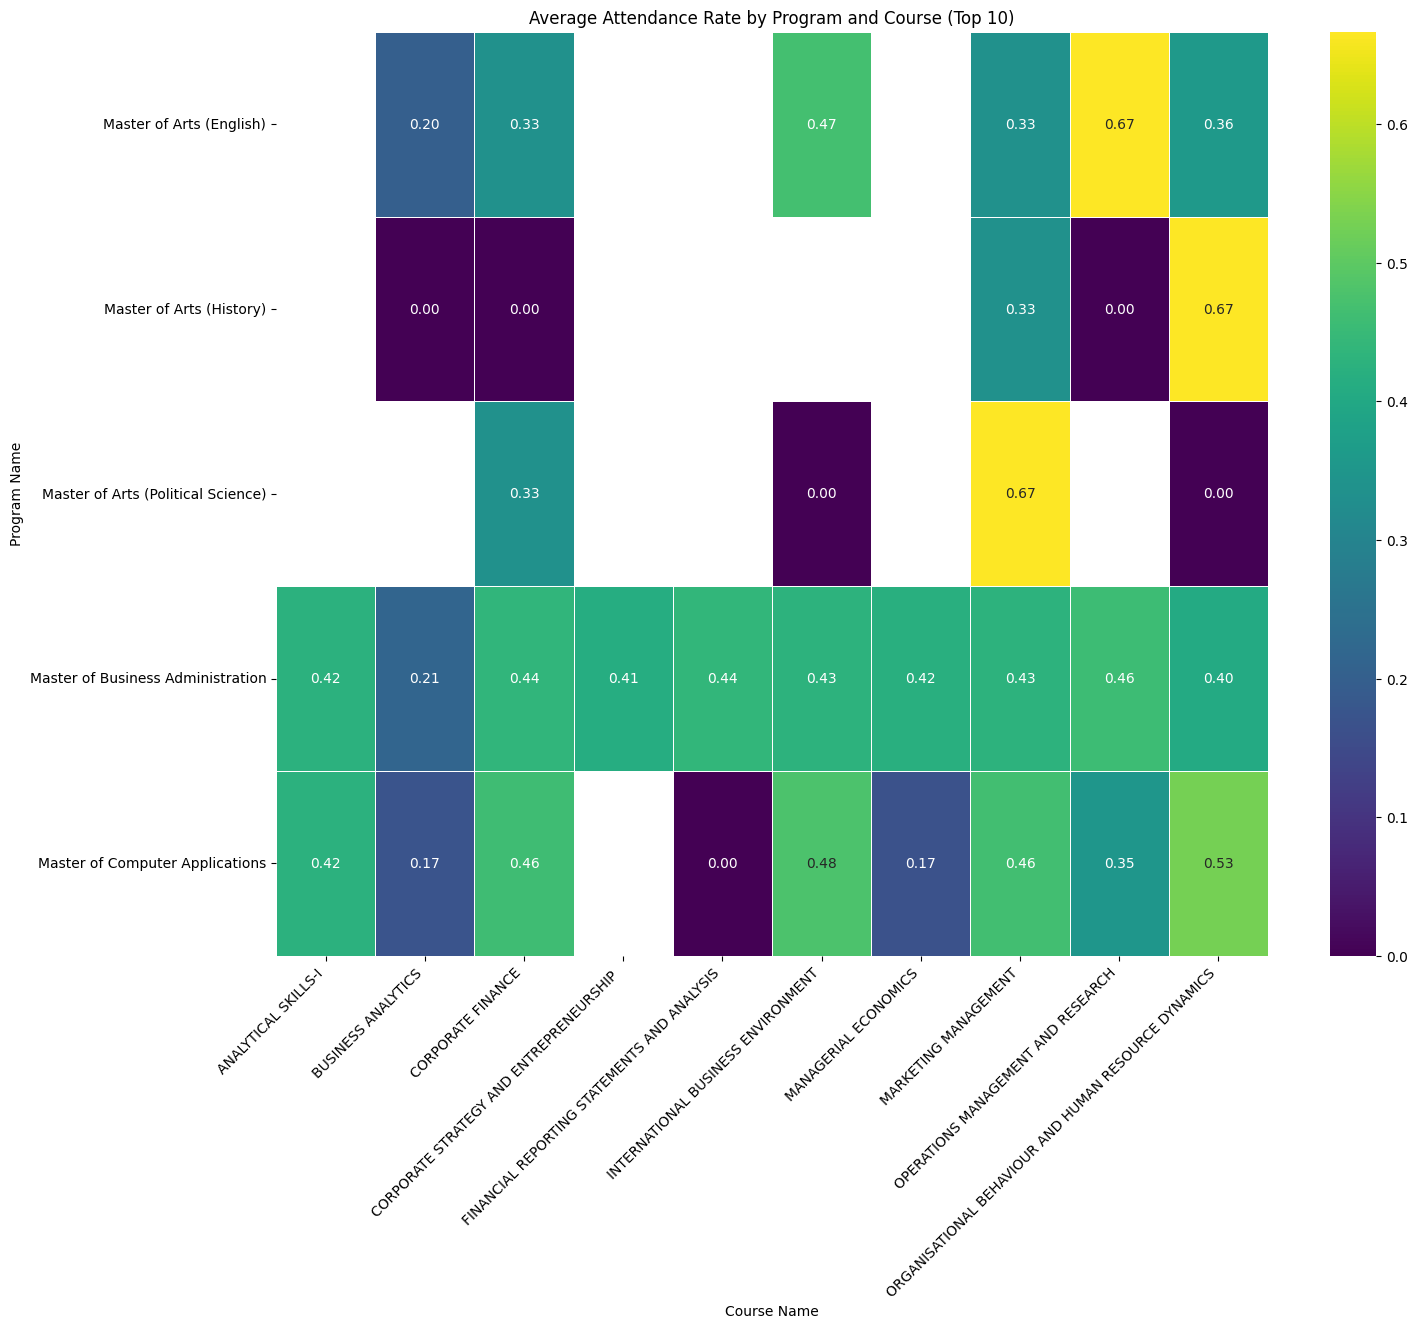

In [26]:
top_programs = df['ProgramName'].value_counts().head(10).index
top_courses = df['CourseName'].value_counts().head(10).index

filtered_df = df[df['ProgramName'].isin(top_programs) & df['CourseName'].isin(top_courses)]

attendance_pivot = filtered_df.pivot_table(values='AttendanceRate', index='ProgramName', columns='CourseName', aggfunc='mean')

plt.figure(figsize=(16, 12))
sns.heatmap(attendance_pivot, cmap='viridis', linewidths=0.5, annot=True, fmt=".2f")
plt.title('Average Attendance Rate by Program and Course (Top 10)')
plt.xlabel('Course Name')
plt.ylabel('Program Name')
plt.xticks(rotation=45, ha='right')
plt.show()

# Histo family / distri of net present

/Users/visheshyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


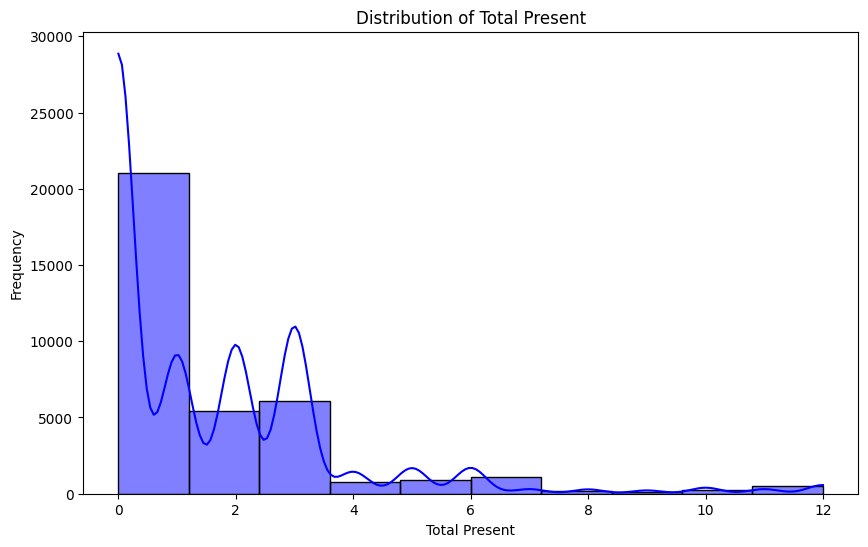

In [27]:

# Calculate Attendance Rate
df['AttendanceRate'] = df['TotalPresent'] / df['TotalScheduled']

# Plot histogram for Total Present
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPresent'], bins=10, kde=True, color='blue')
plt.title('Distribution of Total Present')
plt.xlabel('Total Present')
plt.ylabel('Frequency')
plt.show()

## histo 2

/Users/visheshyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


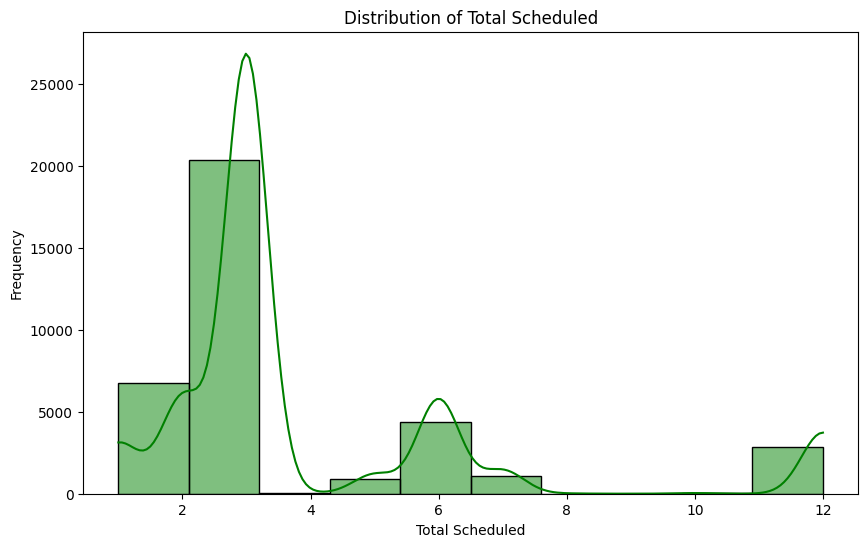

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalScheduled'], bins=10, kde=True, color='green')
plt.title('Distribution of Total Scheduled')
plt.xlabel('Total Scheduled')
plt.ylabel('Frequency')
plt.show()

## histo 3 Attd rate

/Users/visheshyadav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


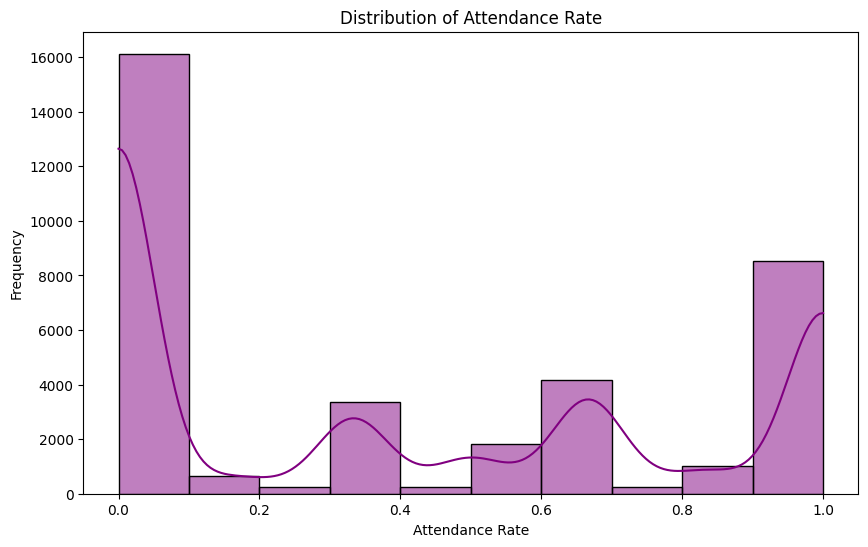

In [29]:
# Plot histogram for Attendance Rate
plt.figure(figsize=(10, 6))
sns.histplot(df['AttendanceRate'], bins=10, kde=True, color='purple')
plt.title('Distribution of Attendance Rate')
plt.xlabel('Attendance Rate')
plt.ylabel('Frequency')
plt.show()

# piechrt of top 10 course distri

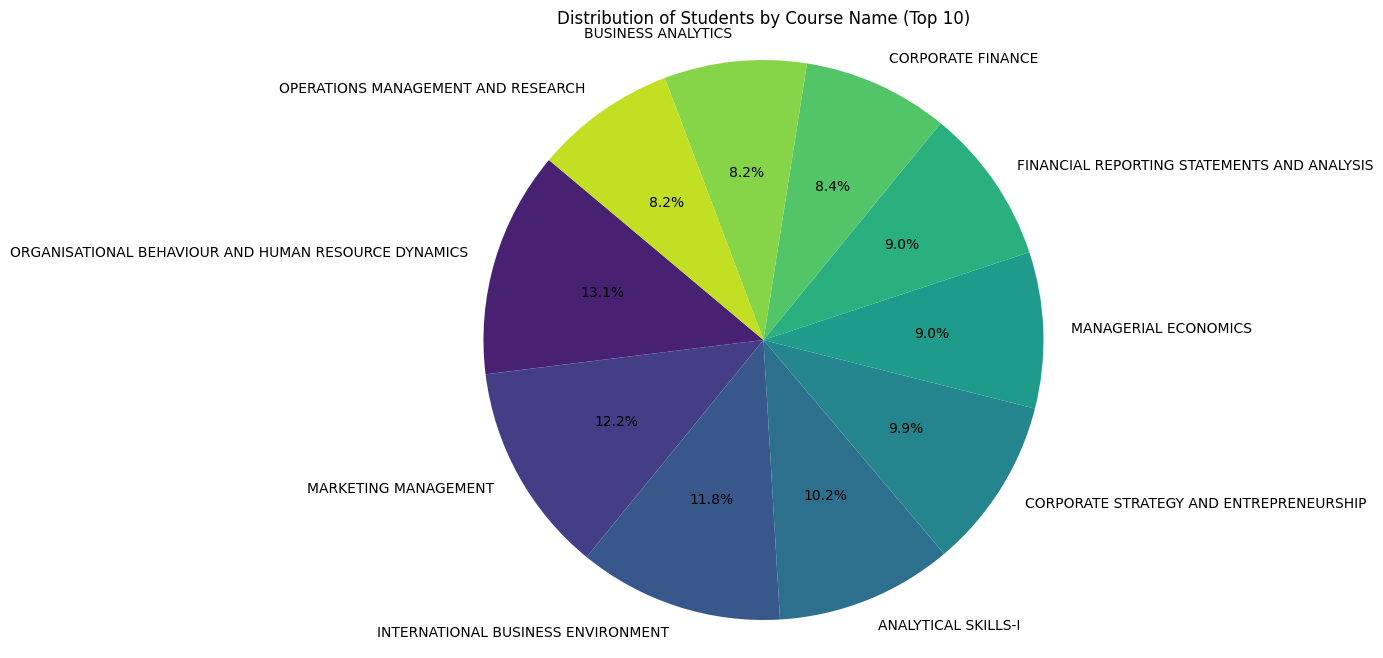

In [30]:
course_counts = df['CourseName'].value_counts().head(10)  
plt.figure(figsize=(10, 8))
plt.pie(course_counts, labels=course_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(course_counts)))
plt.title('Distribution of Students by Course Name (Top 10)')
plt.axis('equal')  
plt.show()